<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
!rm -rf /kaggle/working/*
! pip install --quiet gdown prefetch_generator lmdb
! gdown 1KWwma-vCZnG5fmYe-D5qxe779dHzTrE4

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 7.8 MB/s eta 0:00:00
Downloading...
From: https://drive.google.com/uc?id=1KWwma-vCZnG5fmYe-D5qxe779dHzTrE4
To: /kaggle/working/vietocr.zip
100%|█████████████████████████████████████████| 607k/607k [00:00<00:00, 134MB/s]


In [2]:
!unzip -o /kaggle/working/vietocr.zip -d /kaggle/working

Archive:  /kaggle/working/vietocr.zip
   creating: /kaggle/working/image/
 extracting: /kaggle/working/image/.keep  
  inflating: /kaggle/working/image/sample.png  
  inflating: /kaggle/working/image/vietocr.jpg  
   creating: /kaggle/working/vietocr/
   creating: /kaggle/working/vietocr/loader/
  inflating: /kaggle/working/vietocr/loader/aug.py  
  inflating: /kaggle/working/vietocr/loader/dataloader.py  
  inflating: /kaggle/working/vietocr/loader/dataloader_v1.py  
 extracting: /kaggle/working/vietocr/loader/__init__.py  
   creating: /kaggle/working/vietocr/model/
   creating: /kaggle/working/vietocr/model/backbone/
  inflating: /kaggle/working/vietocr/model/backbone/cnn.py  
  inflating: /kaggle/working/vietocr/model/backbone/resnet.py  
  inflating: /kaggle/working/vietocr/model/backbone/vgg.py  
 extracting: /kaggle/working/vietocr/model/backbone/__init__.py  
  inflating: /kaggle/working/vietocr/model/beam.py  
   creating: /kaggle/working/vietocr/model/seqmodel/
  inflating: /

In [3]:
!pip install -r /kaggle/working/vietocr/requirement.txt

  Attempting uninstall: einops
    Found existing installation: einops 0.8.0
    Uninstalling einops-0.8.0:
      Successfully uninstalled einops-0.8.0


# Inference

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [5]:
config = Cfg.load_config_from_name('vgg_seq2seq')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [6]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [7]:
detector = Predictor(config)

10935it [00:09, 1110.13it/s]
/kaggle/working/vietocr/tool/predictor.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights, map_locati

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [8]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.7 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [9]:
config = Cfg.load_config_from_name('vgg_seq2seq')

In [10]:
!rm -rf /kaggle/working/*
dataset_params = {
    'name':'hw',
    'data_root':'/kaggle/input/zip-ocr',
    'train_annotation':'label_train.txt',
    'valid_annotation':'label_val.txt'
}

params = {
         'print_every':10,
         'valid_every':50,
          'iters':100,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 20000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [11]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 10,
  'valid_every': 50,
  'iters': 100,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 20000},
 'dataset': {'name': 'hw',
  'data_root': '/kaggle/input/zip-ocr',
  'train_annotation': 'label_train.txt',
  'valid_annotation': 'label_val.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},
 'dataloader': {'num_workers': 3, 'pin_memory': True},
 'aug'

You should train model from our pretrained 

In [12]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:03<00:00, 172MB/s]
/kaggle/working/vietocr/model/trainer.py:314: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of t

Model weight /tmp/vgg_seq2seq.pth exsits. Ignore download!


Create train_hw: 100%|██████████████████████████████████████████| 1339/1339 [00:14<00:00, 93.89it/s]


Remove 4 invalid images
Created dataset with 1334 samples


Create valid_hw: 100%|████████████████████████████████████████████| 327/327 [00:03<00:00, 95.01it/s]


Created dataset with 326 samples


valid_hw build cluster: 100%|█████████████████████████████████| 326/326 [00:00<00:00, 104970.30it/s]


Save model configuration for inference, load_config_from_file

In [13]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

In [14]:
# trainer.visualize_dataset()

Train now

In [15]:
trainer.train()

iter: 000010 - train loss: 0.878 - lr: 1.00e-03 - load time: 1.02 - gpu time: 3.43
iter: 000020 - train loss: 0.574 - lr: 9.64e-04 - load time: 1.57 - gpu time: 1.77
iter: 000030 - train loss: 0.586 - lr: 8.72e-04 - load time: 1.39 - gpu time: 1.81
iter: 000040 - train loss: 0.519 - lr: 7.35e-04 - load time: 1.49 - gpu time: 1.61
iter: 000050 - train loss: 0.450 - lr: 5.70e-04 - load time: 1.68 - gpu time: 1.76
iter: 000050 - valid loss: 0.440 - acc full seq: 0.7375 - acc per char: 0.8560
iter: 000060 - train loss: 0.463 - lr: 3.96e-04 - load time: 0.39 - gpu time: 1.59
iter: 000070 - train loss: 0.427 - lr: 2.35e-04 - load time: 1.63 - gpu time: 1.75
iter: 000080 - train loss: 0.396 - lr: 1.06e-04 - load time: 1.10 - gpu time: 2.31
iter: 000090 - train loss: 0.434 - lr: 2.45e-05 - load time: 1.85 - gpu time: 1.59
iter: 000100 - train loss: 0.412 - lr: 3.09e-07 - load time: 1.24 - gpu time: 1.64
iter: 000100 - valid loss: 0.413 - acc full seq: 0.8000 - acc per char: 0.8886


Visualize prediction from our trained model


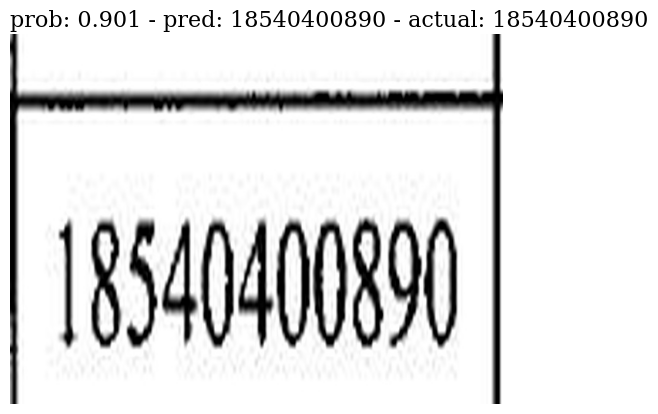

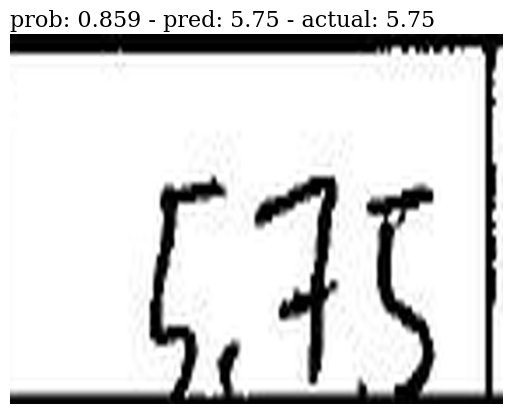

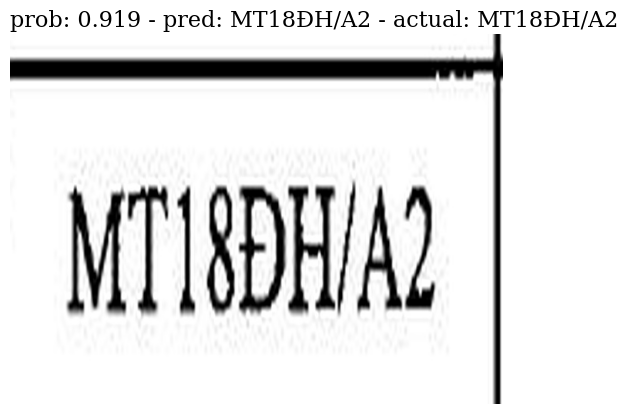

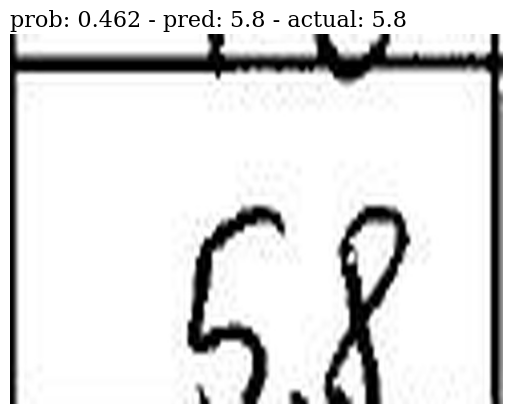

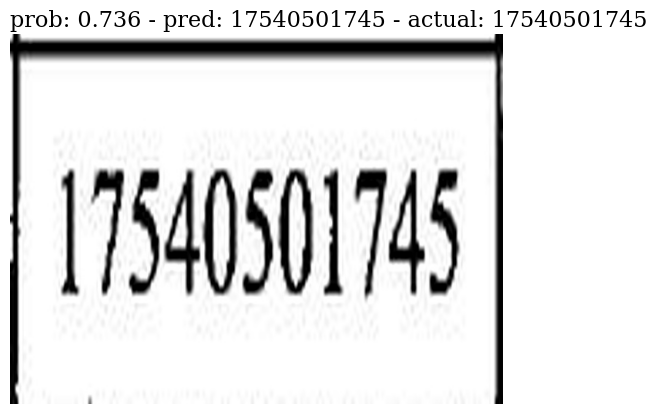

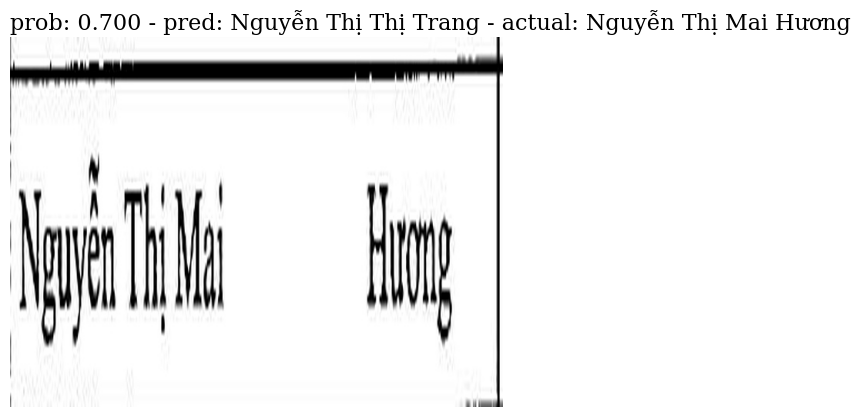

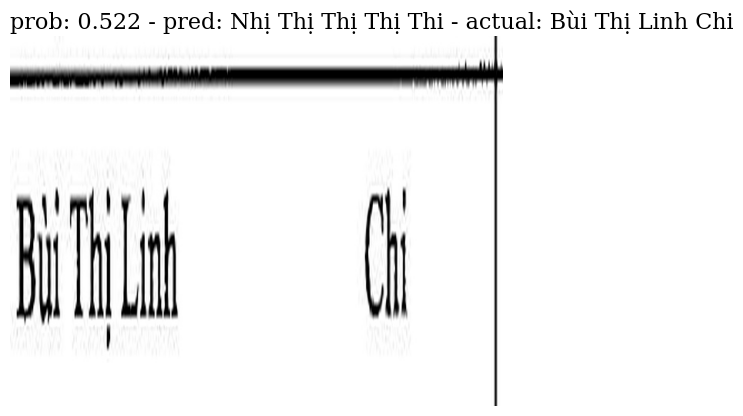

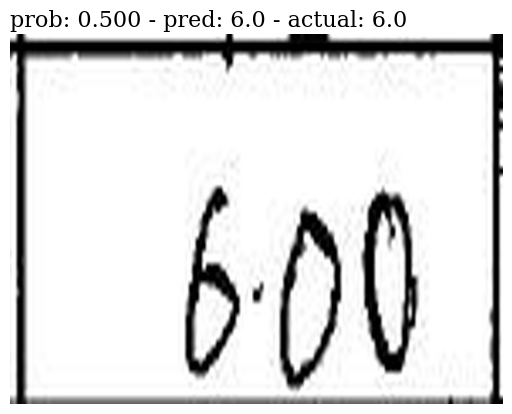

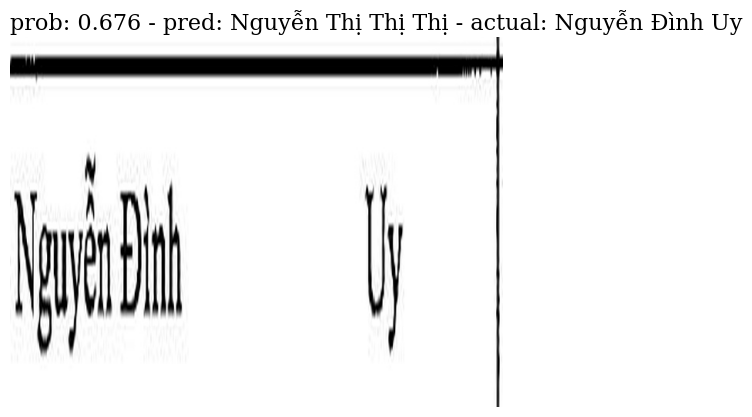

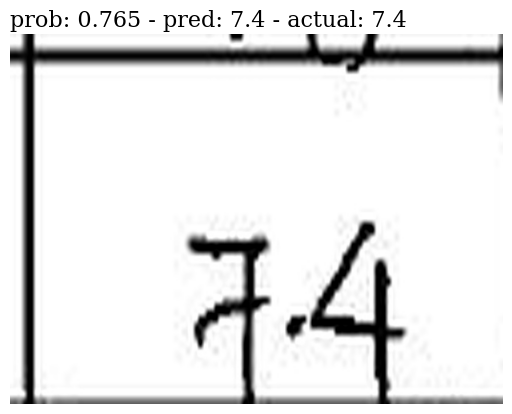

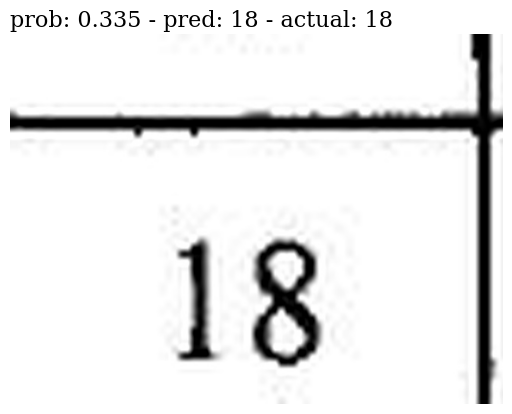

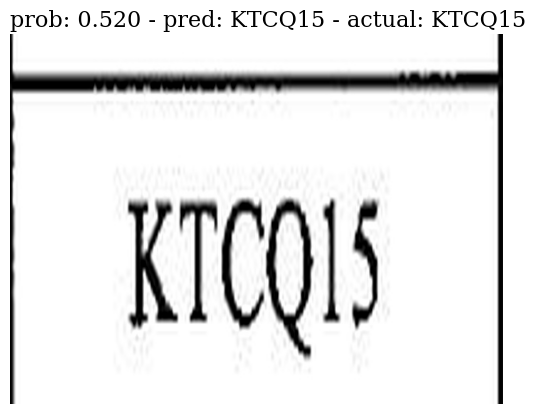

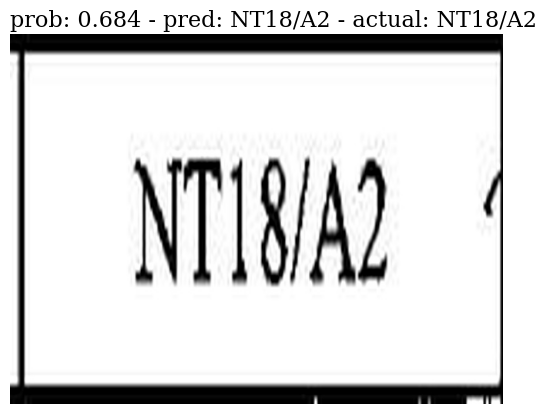

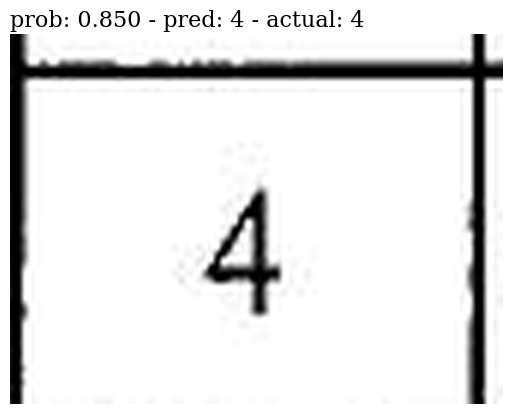

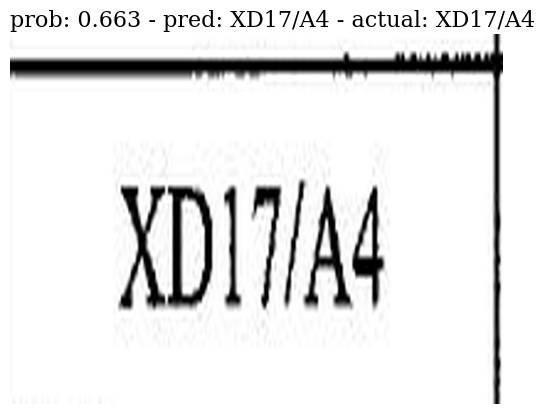

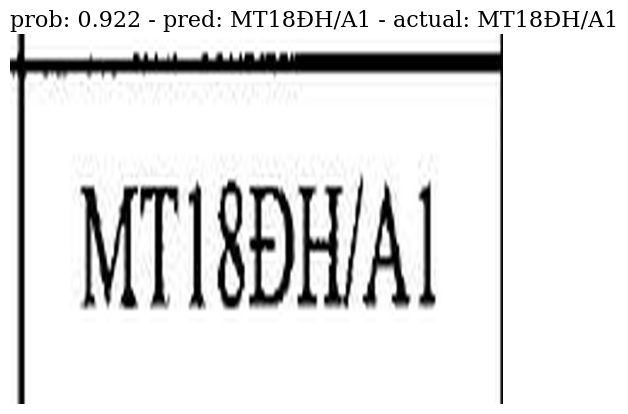

In [16]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [17]:
trainer.precision()

(0.803125, 0.88656205)